In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
df = pd.read_csv(r"C:\CS2441\Student performance\StudentsPerformance.csv")

In [7]:
print(df.head())

   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degree      standard   
3    male        group A          associate's degree  free/reduced   
4    male        group C                some college      standard   

  test preparation course  math score  reading score  writing score  
0                    none          72             72             74  
1               completed          69             90             88  
2                    none          90             95             93  
3                    none          47             57             44  
4                    none          76             78             75  


In [9]:
print("\nData Info:")
print(df.info())


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB
None


In [13]:
print("\nMissing values:\n", df.isnull().sum())


Missing values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


In [15]:
df["average_score"] = df[["math score", "reading score", "writing score"]].mean(axis=1)

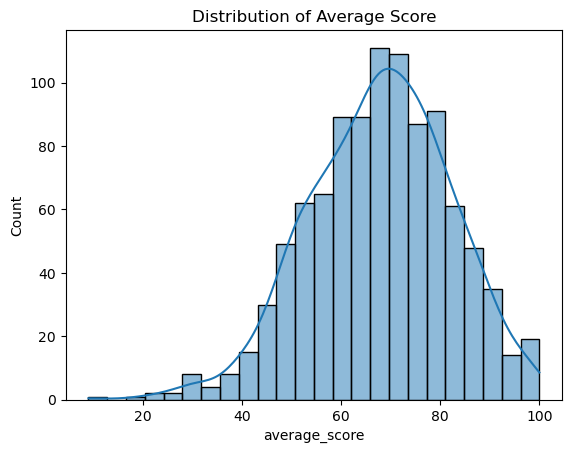

In [17]:
sns.histplot(df["average_score"], kde=True)
plt.title("Distribution of Average Score")
plt.show()

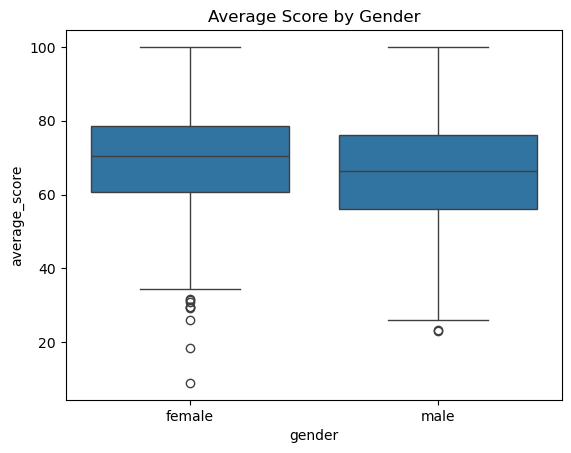

In [19]:
sns.boxplot(x="gender", y="average_score", data=df)
plt.title("Average Score by Gender")
plt.show()


In [21]:
df = pd.get_dummies(df, drop_first=True)

In [23]:
X = df.drop(columns=["average_score"])
y = df["average_score"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
from sklearn.metrics import r2_score, root_mean_squared_error

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = root_mean_squared_error(y_test, y_pred)

print("\nModel Evaluation:")
print("R² Score:", round(r2, 3))
print("RMSE:", round(rmse, 3))


Model Evaluation:
R² Score: 1.0
RMSE: 0.0


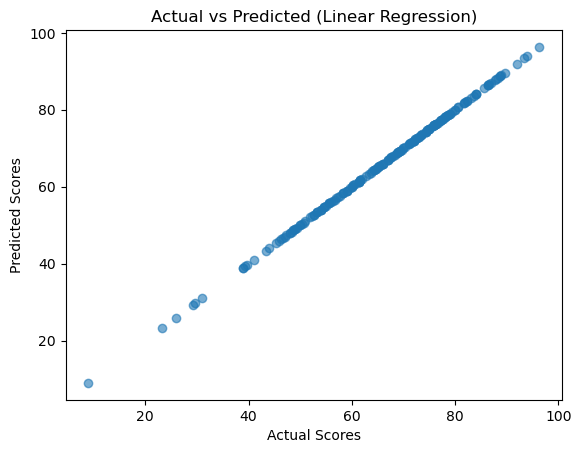

In [42]:
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual Scores")
plt.ylabel("Predicted Scores")
plt.title("Actual vs Predicted (Linear Regression)")
plt.show()